In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [7]:
# Parameters of the problem
R        = tf.Variable([[1],[2]], dtype=tf.float32) # Reference model: R is the expected solution A * R = Y
sigmaY   = 0.2        # standard deviation of the noise applied to the observed values
N        = 100        # Number of samples
seedinit = 0          # Initialization value for random generation

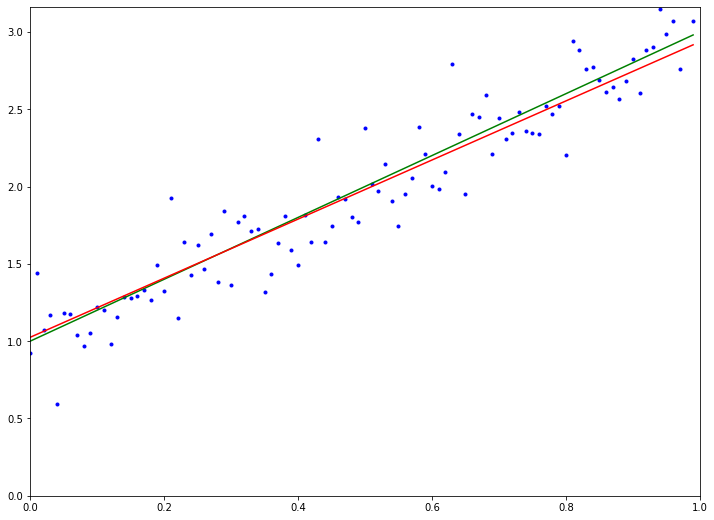

In [10]:
# Generating the input values
X = tf.reshape(tf.range(start=0, limit=1, delta=1.0/N, dtype=tf.float32), (N,1))
# Building the matrix: A x = y
A = tf.concat((tf.ones((N,1),dtype=tf.float32),X), 1)
# Generating observed values
Y = tf.matmul(A, R) + tf.random_normal([N, 1], mean=0, stddev=sigmaY, seed = seedinit)
# Computing the solution is the classical formula of ordinary least squares S = (A' * A)^-1 * A' * Y
S = tf.matmul(tf.linalg.inv(tf.matmul(tf.transpose(A),A)), tf.matmul(tf.transpose(A), Y))
# Initializing the global variables for the session
init = tf.global_variables_initializer()
# Opening the session to compute the results
with tf.Session() as sess:
    sess.run(init)
    Xout = X.eval(session=sess)
    Yout = Y.eval(session=sess)
    Sout = sess.run(S)
    ZRout = tf.matmul(A, R).eval(session=sess)
    Zout = tf.matmul(A, S).eval(session=sess)
# Preparing the figure
plt.figure(figsize=(12,9))
# Setting the axes
plt.axis([0, 1, 0, (Sout[0][0] + Sout[1][0] + sigmaY) ])
# Plotting the samples
plt.plot(Xout, Yout, 'b.')
# Plotting the values from the reference model
plt.plot(Xout, ZRout, 'g')
# Plotting the values from computed model
plt.plot(Xout, Zout, 'r')